Jupyter has issues on M1 macOS, to fix, run this before running this notebook

```pip install "jupyter-client<8" "pyzmq<25"```

See: https://github.com/microsoft/vscode-jupyter/issues/12775

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt

import sanpy

In [2]:
# from sanpy.analysisUtils import extractClips

In [38]:
#path = '/Users/cudmore/Dropbox/data/cell-shortening/cell 05.tif'

# bad: between ap is neg, within ap pos
#path = '/Users/cudmore/Dropbox/data/cell-shortening/fig1a/20220608_cell11.tif'

# noisy diameter
#path = '/Users/cudmore/Dropbox/data/cell-shortening/fig1a/20220627_cell10.tif'

# good
path = '/Users/cudmore/Dropbox/data/cell-shortening/fig1a/20220627_cell11.tif'

# good, three outliers in diameter, remove manually
#path = '/Users/cudmore/Dropbox/data/cell-shortening/fig1a/20220718_cell02.tif'

ba = sanpy.bAnalysis(path)

#ba.file
#extractClips(pntList, y, prePnt=20, postPnt=20

ERROR sanpy.kymAnalysis  kymAnalysis.py loadAnalysis() line:670 -- Did not find key minInt in loaded file columns
ERROR sanpy.kymAnalysis  kymAnalysis.py loadAnalysis() line:670 -- Did not find key maxInt in loaded file columns
ERROR sanpy.kymAnalysis  kymAnalysis.py loadAnalysis() line:670 -- Did not find key rangeInt in loaded file columns


<IPython.core.display.Javascript object>


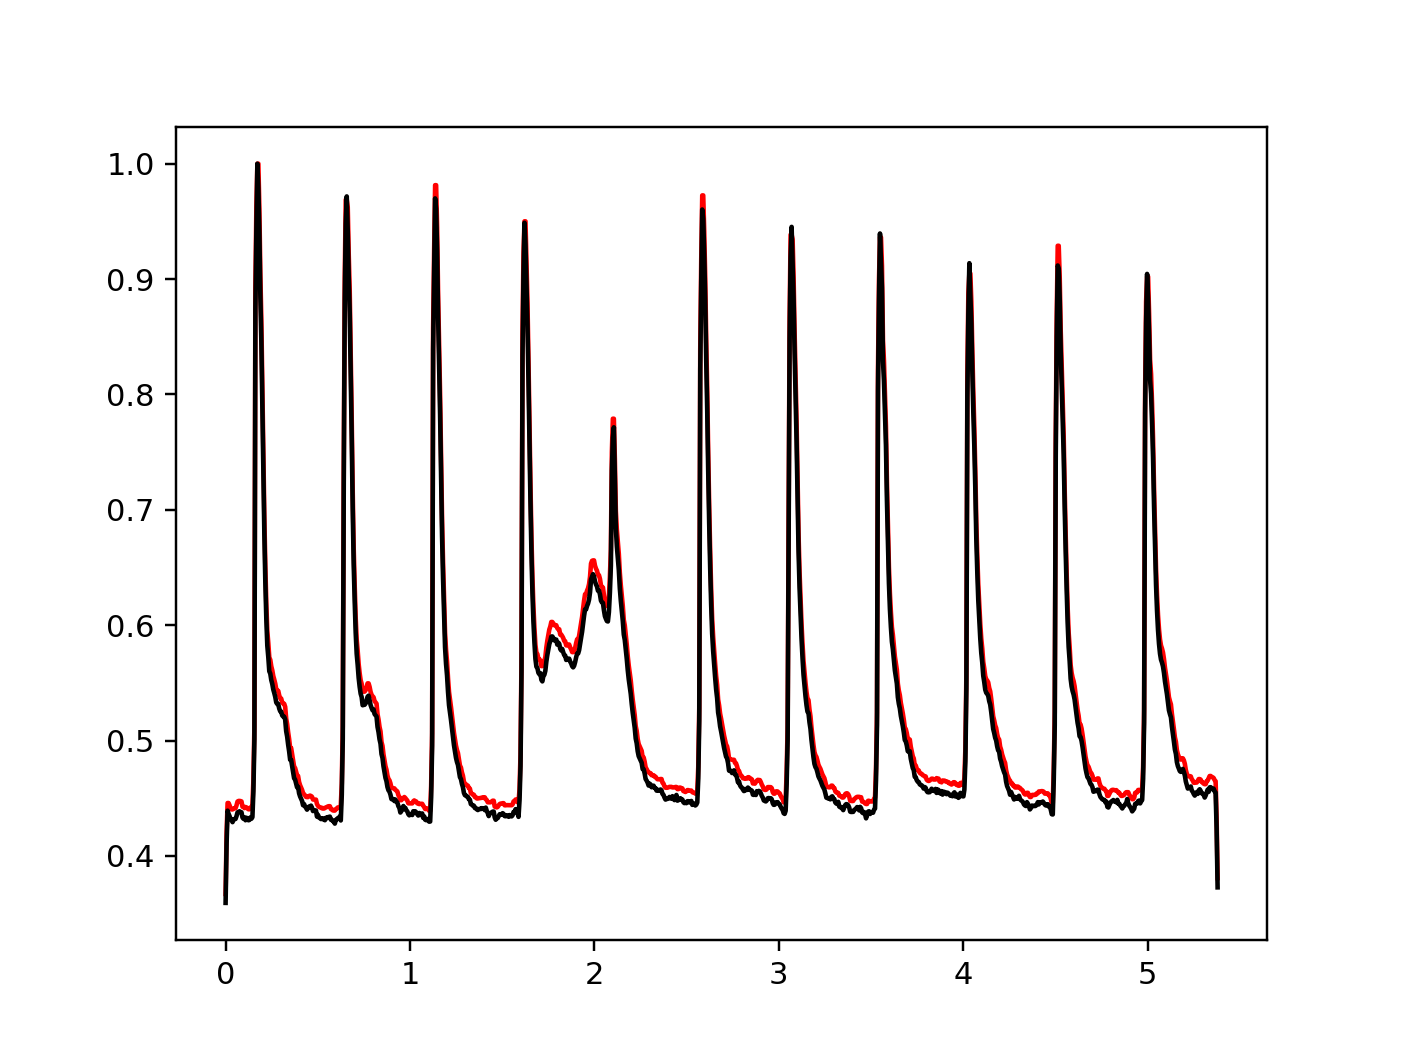

In [39]:
# plot sum

sweepX = ba.fileLoader.sweepX
# sweepY = ba.fileLoader.sweepY
sumintensity_filt = ba.kymAnalysis.getResults("sumintensity_filt")
sumintensity_filt /= np.max(sumintensity_filt)
sumintensity = ba.kymAnalysis.getResults("sumintensity")

fig, ax1 = plt.subplots()
ax1.plot(sweepX, sumintensity_filt, 'r');
ax1.plot(sweepX, sumintensity, 'k');


Available diameter keys are:
    
['time_bin', 'time_sec', 'sumintensity_raw', 'sumintensity_filt', 'sumintensity', 'diameter_pnts', 'diameter_um', 'diameter_um_filt', 'left_pnt', 'right_pnt', 'minInt', 'maxInt', 'rangeInt']

<IPython.core.display.Javascript object>


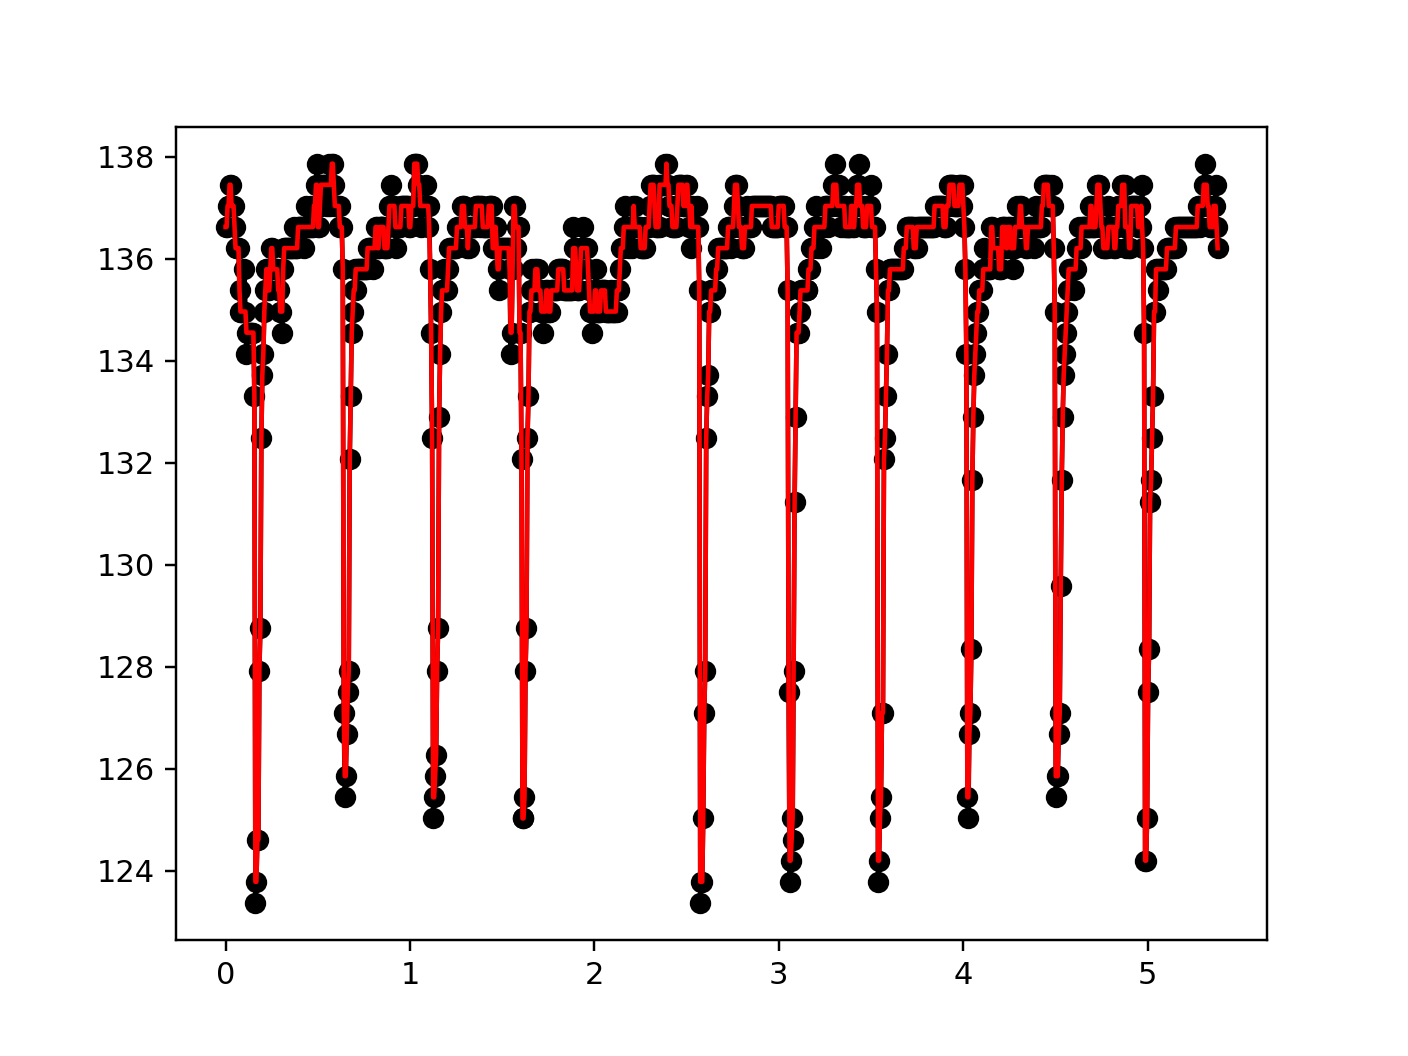

In [40]:
# plot diameter

time_sec = ba.kymAnalysis.getResults("time_sec")
time_sec = np.array(time_sec)
diameter_um = ba.kymAnalysis.getResults("diameter_um")
diameter_um_filt = ba.kymAnalysis.getResults("diameter_um_filt")

# print(time_sec.shape)
# print(diameter_um.shape)
# print(diameter_um_filt.shape)

# time_sec = time_sec[diameter_um > 88]
# diameter_um = diameter_um[diameter_um > 88]


fig, ax1 = plt.subplots()
ax1.plot(time_sec, diameter_um, 'ko-');
ax1.plot(time_sec, diameter_um_filt, 'r');


<IPython.core.display.Javascript object>


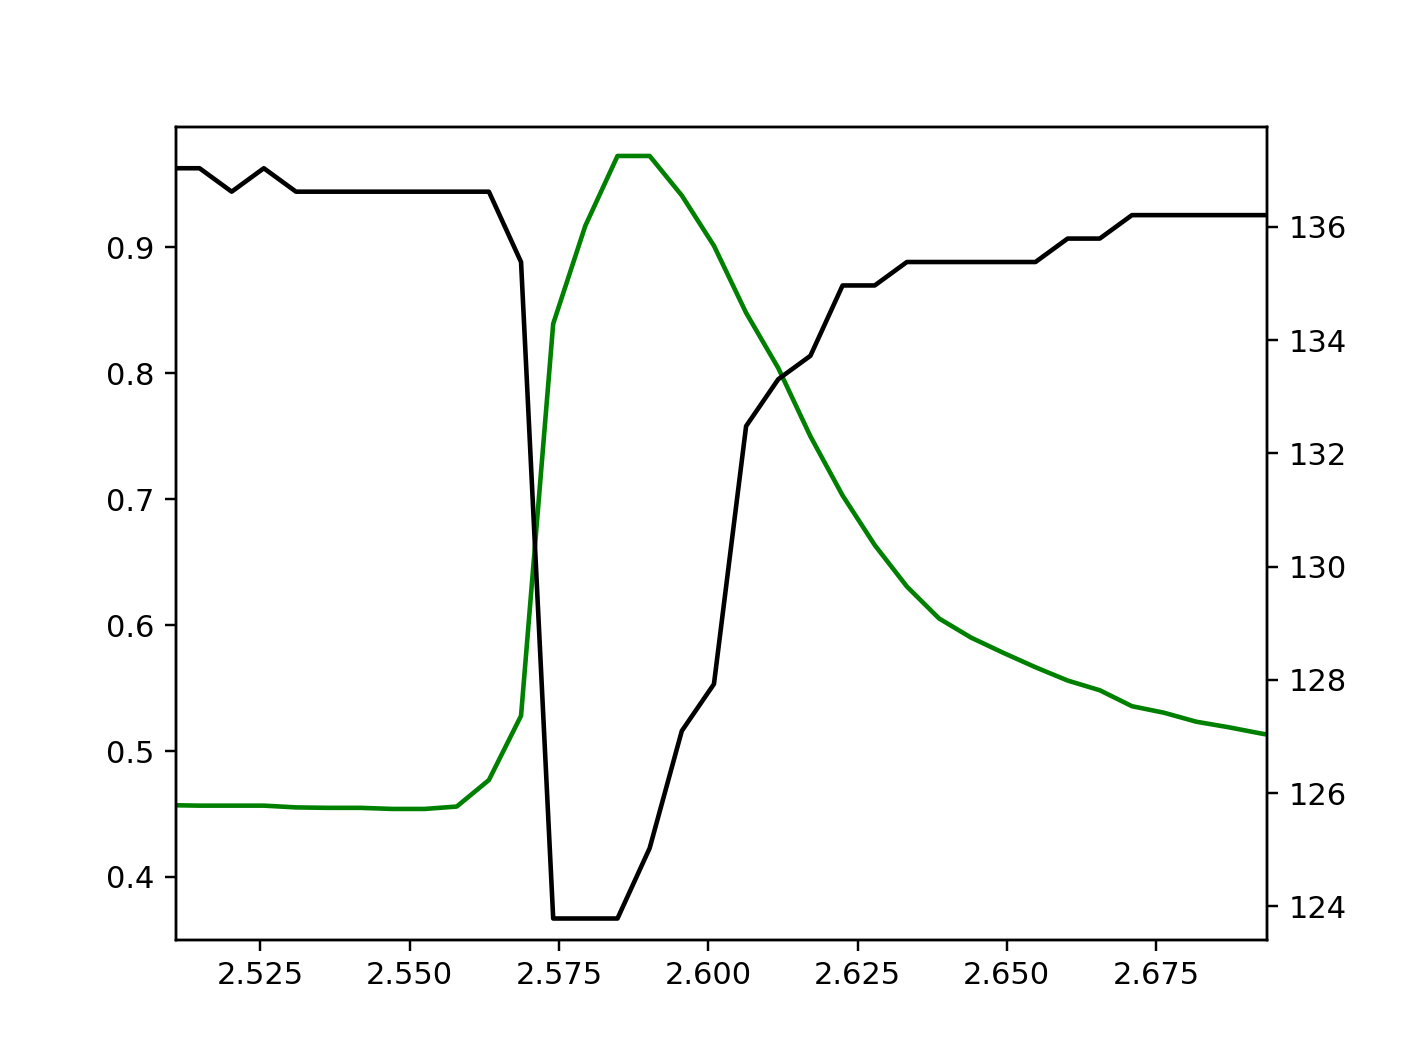

In [42]:
# plot sum intensity (left) and diam (right)

# k_diam_foot_sec = ba.getStat('k_diam_foot_sec', getFullList=True)
# k_diam_foot = ba.getStat('k_diam_foot')
# k_diam_peak_sec = ba.getStat('k_diam_peak_sec')
# k_diam_peak = ba.getStat('k_diam_peak')

diameter_um_filt2 = diameter_um_filt - 0

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(time_sec, sumintensity_filt, 'g')
ax2.plot(time_sec, diameter_um_filt2, 'k')

# ax2.plot(k_diam_foot_sec, k_diam_foot, 'ro')
# ax2.plot(k_diam_peak_sec, k_diam_peak, 'bo')


<IPython.core.display.Javascript object>


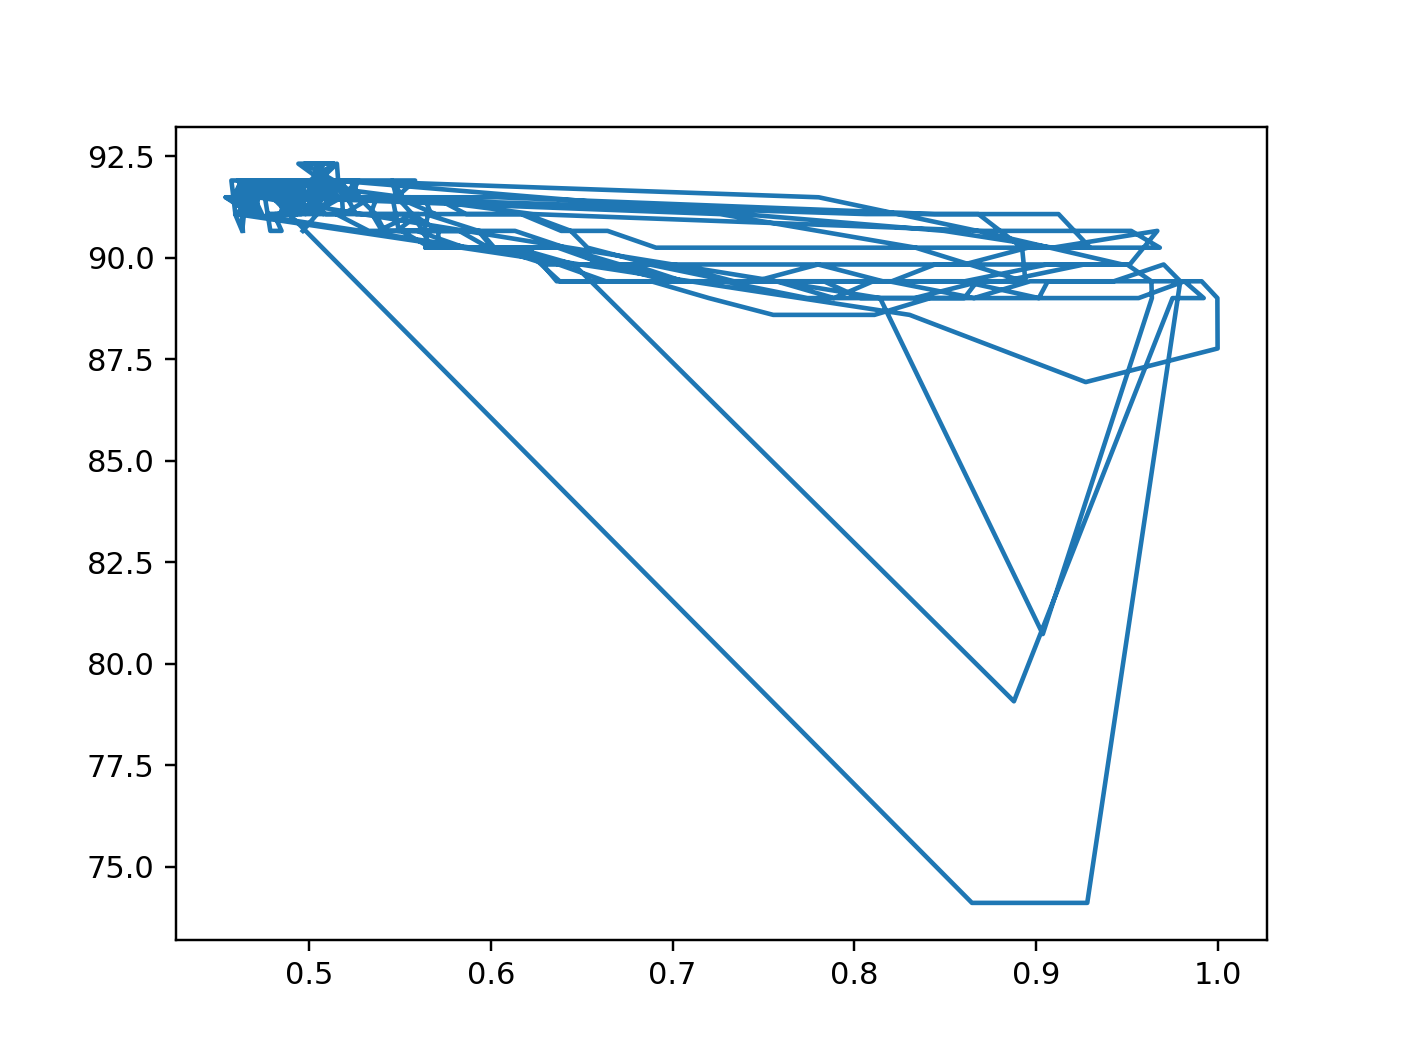

In [13]:
# plot sum vs diameter (phae plot)
fig, ax1 = plt.subplots()
ax1.plot(sweepY, yDiam_um);